# T20 file creation notebook  

This notebook will create the final version of the data that can be analysed for chapter 2/circadian disruption project. The data needs to be checked that the LDR is fine, and then annotated and saved. 

Explicit steps as follows: 
1. Import data  
2. Visualise data  
3. Remap the LDR so high = 200, low =0 <- may involve fixing any errors
4. Find the transitions between the conditions 
5. Label the different conditions in the light_period column
6. save the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib
import actigraphy_analysis.actogram_plot as act

### Step One - import the data 

In [2]:
# set a few constants 
chamber = "6D"
label_col = "light_period"
def quickplot(data):
    data.plot(subplots=True,
              figsize=(20,10))

In [3]:
input_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                         "09_pirdata/03_experiment_files")
file_name = "exp_11_6D_pir_data.csv"
file_path = input_dir / file_name
data = pd.read_csv(file_path,
                   index_col=0,
                   parse_dates=True)

### Fix a few required settings in the dataframe

Sort the index  
Remove the chamber column 

In [4]:
data.sort_index(inplace=True)
chamber_col = data.pop(chamber)

### Step Two - Visualise the data 

Check to see if there are any obvious errors, especially in the LDR

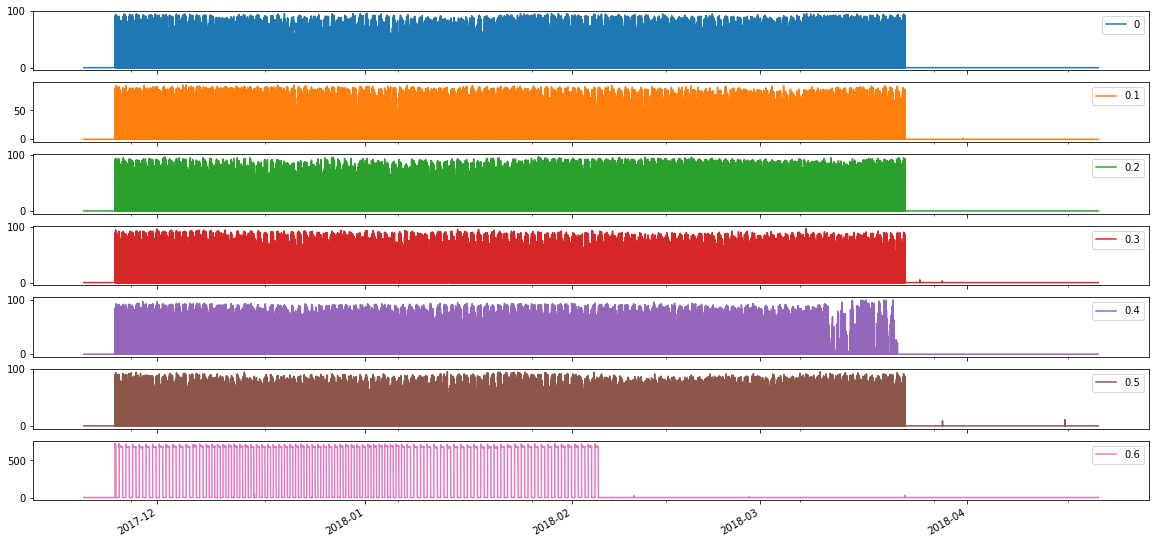

In [5]:
quickplot(data)

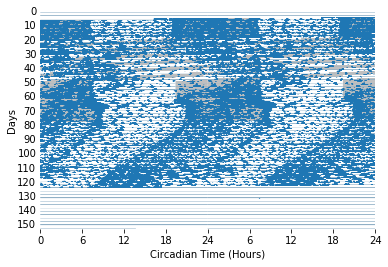

In [6]:
act.actogram_plot_from_df(data, animal_number=1, period="24H", showfig=True)

Appears fine, no errors in the LDR.  
Channel 0.4 appears to go funny at the end <- not going to fix just ignore as won't use that data. 

### Step Three - remap LDR 

Appears fine at the moment, not necessary for this experiment

### Step Four - find the transitions between the conditions  

This information comes from notes about when different conditions occured combined with checking the LDR for onset of the light cycle. 

In [7]:
# create new df to label
data_annotated = data.copy()

In [8]:
# Define the baseline period 
baseline_start = '2017-11-25 07:00:00'
baseline_end = '2017-12-8 07:00:00'
baseline_data = data.loc[baseline_start:baseline_end]

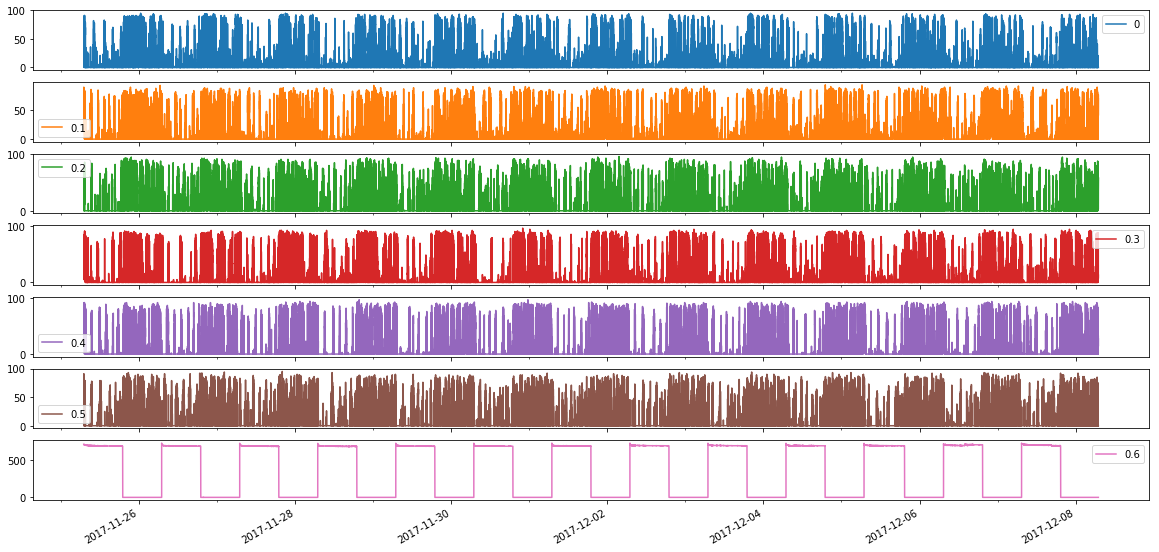

In [9]:
quickplot(baseline_data)

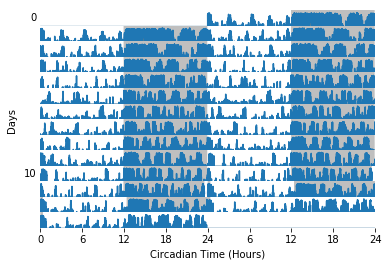

In [10]:
act.actogram_plot_from_df(baseline_data, 0)

In [11]:
# set the light_period_column 
data_annotated.loc[baseline_start:baseline_end,
                   label_col] = "baseline"

In [12]:
# Disrupted period 
disrupted_start = "2017-12-8 07:00:00"
disrupted_end = "2018-1-7 07:00:00"
disrupted_data = data.loc[disrupted_start:disrupted_end]

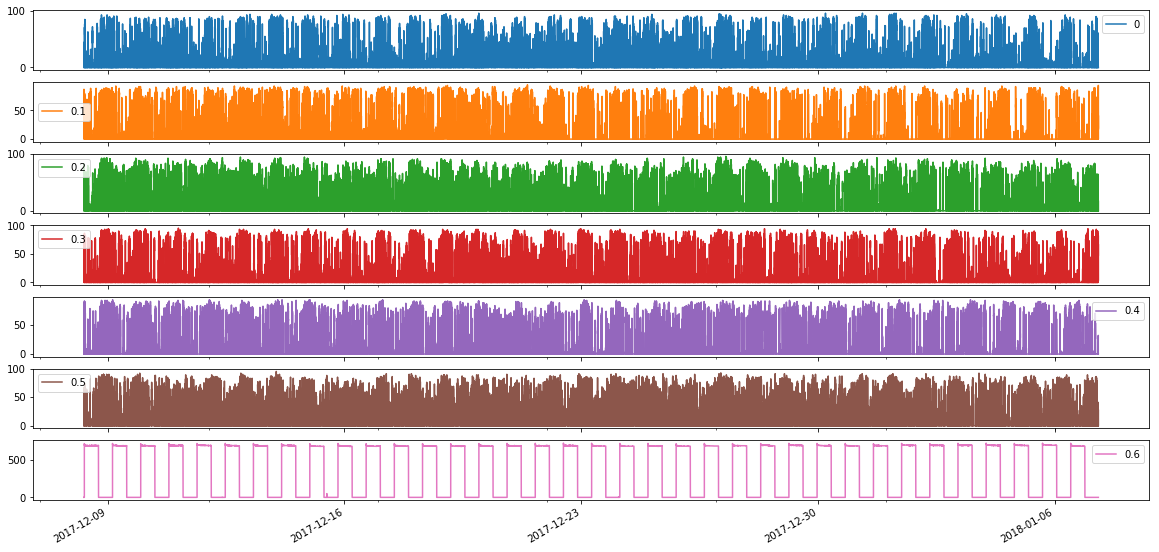

In [13]:
quickplot(disrupted_data)

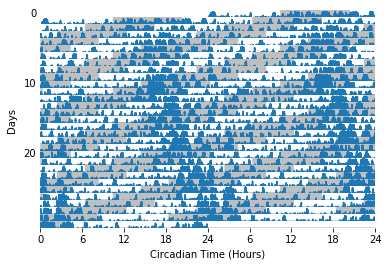

In [14]:
act.actogram_plot_from_df(disrupted_data, 0)

In [15]:
data_annotated.loc[disrupted_start:disrupted_end,
                   label_col] = "disrupted"

### post_disruption_ld

Issue with post_disruption ld as had a 1 hour shift after 10 days.  
Can't find any reasons for it but it means we cannot analyse as a single unit as did have a shift.  
Very annoying issue to have but going to deal with it by separating into pre-shift and post shift

In [16]:
post_baseline_1_start = "2018-1-7 07:23:00"
post_baseline_1_end = "2018-1-23 07:23:00"
post_baseline_1_data = data.loc[post_baseline_1_start:
                                post_baseline_1_end]

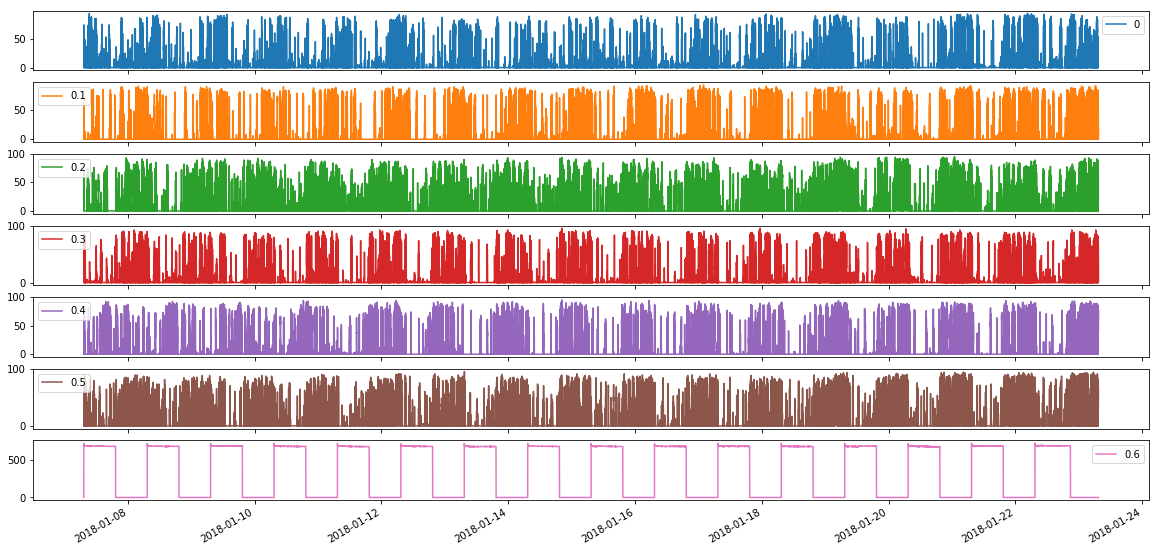

In [17]:
quickplot(post_baseline_1_data)

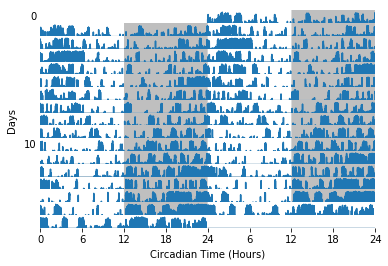

In [18]:
act.actogram_plot_from_df(post_baseline_1_data, 0)

In [19]:
data_annotated.loc[post_baseline_1_start:post_baseline_1_end,
                   label_col] = "post_baseline_1"

In [20]:
post_baseline_2_start = "2018-1-23 08:47:00"
post_baseline_2_end = "2018-2-5 08:47:00"
post_baseline_2_data = data.loc[post_baseline_2_start:
                                post_baseline_2_end]

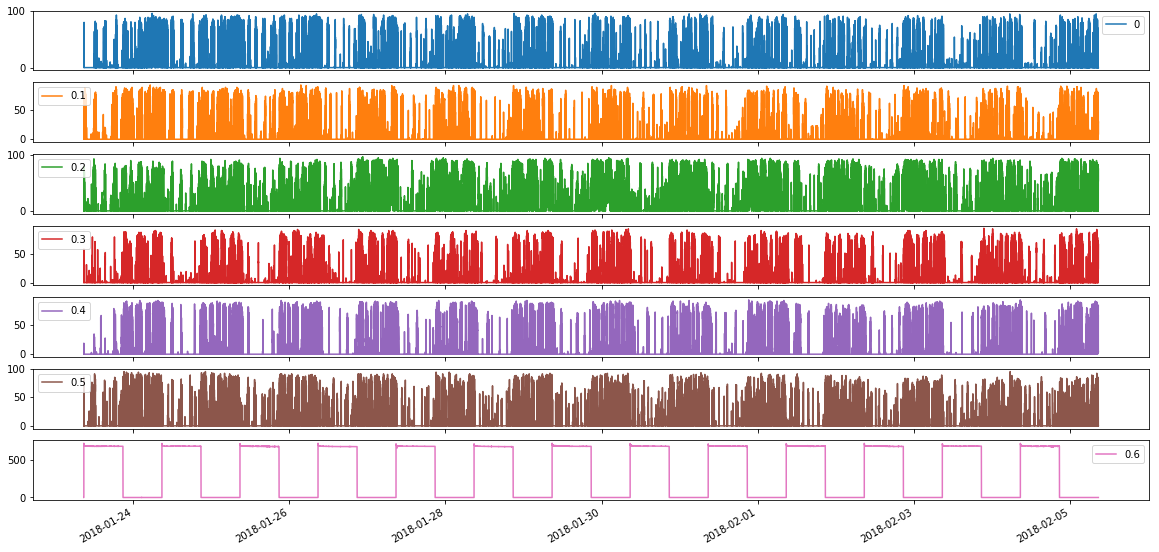

In [21]:
quickplot(post_baseline_2_data)

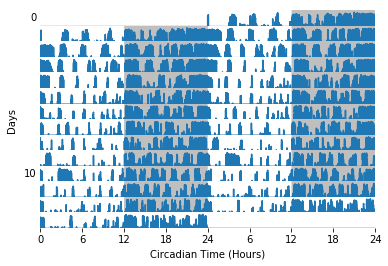

In [22]:
act.actogram_plot_from_df(post_baseline_2_data, 0)

In [23]:
data_annotated.loc[post_baseline_2_start:post_baseline_2_end,
                   label_col] = "post_baseline_2"

In [24]:
dd_start = "2018-2-5 08:47:00"
dd_end = "2018-3-22 08:47:00"
dd_data = data.loc[dd_start:dd_end]

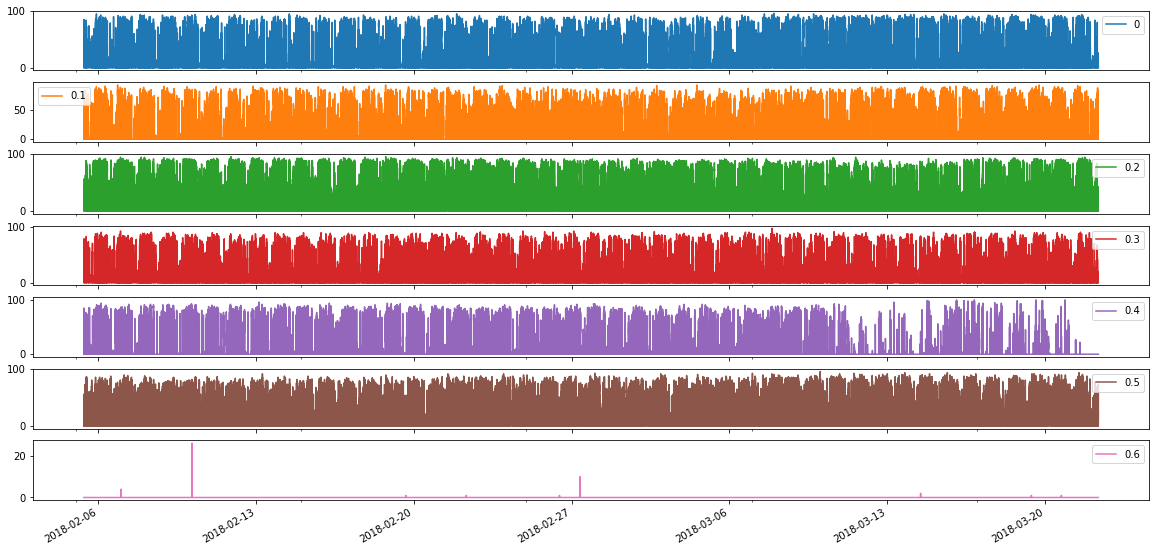

In [25]:
quickplot(dd_data)

act.actogram_plot_from_df(dd_data, 0)

In [26]:
data_annotated.loc[dd_start:dd_end,
                   label_col] = "post_dd"

In [27]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/"
                        "01_PhD_files/01_projects/"
                        "P2_Circ_Disruption_paper_chapt2/"
                        "03_data_files")
file_name = "t20_pir_data.csv"
file_path = save_dir / file_name
data_annotated.to_csv(file_path)

### Bonus extra

Plot the actogram for just the parts we are interested in

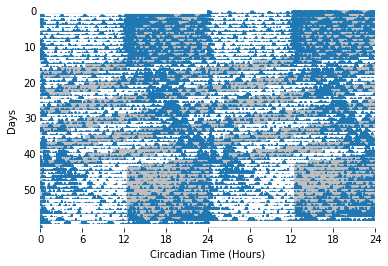

In [28]:
df_act_plot = data.loc[baseline_start:
                       post_baseline_1_end]
act.actogram_plot_from_df(df_act_plot, 0)